In [ ]:
# !pip install pandas pyarrow

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [6]:
# Citește toate fișierele Parquet din folderul respectiv
files = glob.glob("output/tranzactii_parquet/*.parquet")

In [7]:
df_all = pd.concat([pd.read_parquet(f) for f in files])

In [8]:
print(df_all.head())

       timestamp   ip_address  trx_amount
0  1747560921130  192.168.1.3      965.53
0  1747560746933  192.168.1.2      523.16
0  1747560951162  192.168.1.5      641.91
0  1747560864067  192.168.1.2      818.62
0  1747560996213  192.168.1.5      518.54


In [13]:
# Setare stil modern
sns.set_theme(style="whitegrid")

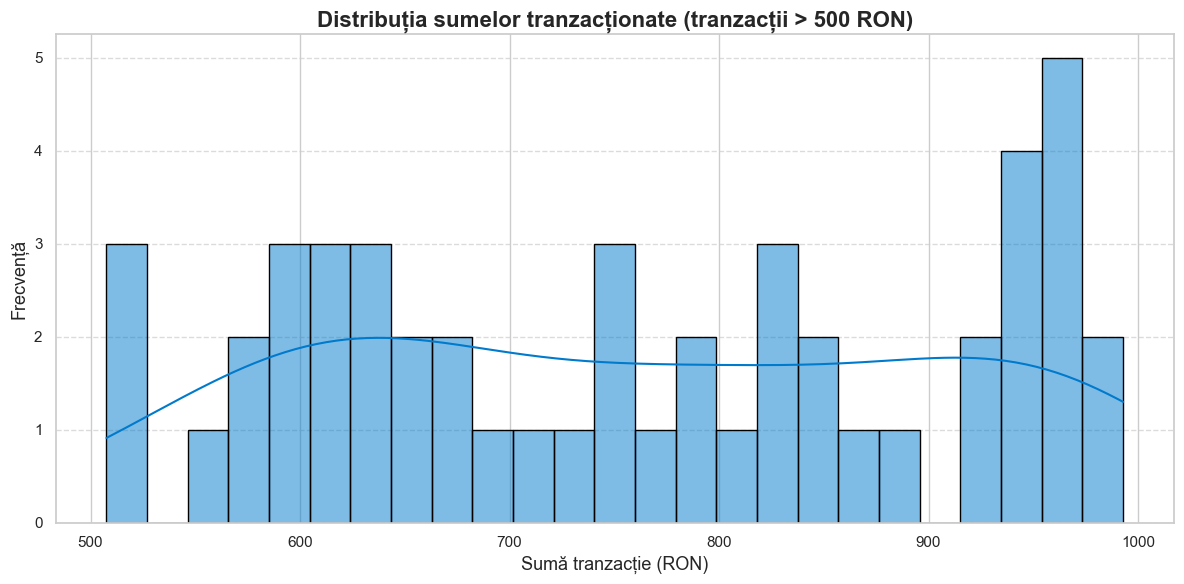

In [15]:
# Grafic histograma sumelor
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    df_all['trx_amount'],
    bins=25,
    kde=True,
    color="#007acc",
    edgecolor="black"
)

# Stilizare axă și titlu
ax.set_title("Distribuția sumelor tranzacționate (tranzacții > 500 RON)", fontsize=16, weight='bold')
ax.set_xlabel("Sumă tranzacție (RON)", fontsize=13)
ax.set_ylabel("Frecvență", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [10]:
df_all.to_csv("tranzactii_filtrate.csv", index=False)